In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
import metpy
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from numpy import inf
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors
from scipy import stats
import matplotlib.pyplot as plt
import tropycal
from tropycal import tracks
from shapely.geometry import Polygon, Point
import xarray as xr
import os
import numpy.ma as ma
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from global_land_mask import globe

In [2]:
# x = np.load('/user/home/al18709/work/event_sets/processing/mpi6_hist/354_rain.npy')
# print(np.sum(x))

In [3]:
ds = xr.load_dataset('/bp1/geog-tropical/data/Obs/MSWEP/3hourly_invertlat/2000342.00.nc')
lat = ds.lat.values
lon = ds.lon.values
lons, lats = np.meshgrid(lon,lat)

population_file = '/user/home/al18709/work/population/ppp_2020_10km_Aggregated_final.nc'
population_count = xr.load_dataset(population_file)
print(population_count)
data = population_count.population.values * 144
population = population_count.population.values * 144
pop = population_count * 144
pop_lats = population_count.lat
pop_lons = population_count.lon
grid_x_pop, grid_y_pop = np.meshgrid(pop_lons,pop_lats)

z = globe.is_land(lats,lons)

pop


<xarray.Dataset>
Dimensions:     (lon: 3600, lat: 1800)
Coordinates:
  * lon         (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 180.0
  * lat         (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Data variables:
    population  (lat, lon) float32 -3.403e+38 -3.403e+38 ... -3.403e+38
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Nov 01 12:12:14 2023: cdo remapnn,mygrid /user/home/al1...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...


/tmp/ipykernel_82437/1712597873.py:9: RuntimeWarning: overflow encountered in multiply
  data = population_count.population.values * 144
/tmp/ipykernel_82437/1712597873.py:10: RuntimeWarning: overflow encountered in multiply
  population = population_count.population.values * 144


<xarray.Dataset>
Dimensions:     (lon: 3600, lat: 1800)
Coordinates:
  * lon         (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 180.0
  * lat         (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Data variables:
    population  (lat, lon) float32 -inf -inf -inf -inf ... -inf -inf -inf -inf
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Nov 01 12:12:14 2023: cdo remapnn,mygrid /user/home/al1...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [4]:
def mask_land(data,z):
    return ma.masked_equal(data * z,0)

In [5]:
print(np.load('/user/home/al18709/work/ke_track_rain/hr/mpi6_hist_pred_qm.npy').shape)

(382908, 100, 100, 1)


In [6]:
percentiles = np.arange(0,100,0.1)
# mpi6 = mask_land(np.max(np.max(np.load('/user/home/al18709/work/ke_track_rain/hr/mpi6_hist_pred_qm.npy')[:,:,:,0],axis=1),axis=1),z)
mpi6 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_hist/mpi6_hist_max_rain_over_land.npy')
# filter out drizzle
mpi6 = mpi6[mpi6 > 4]
p1 = np.percentile(mpi6, percentiles)
del mpi6

mri6 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_hist/mri6_hist_max_rain_over_land.npy')
# filter out drizzle
mri6 = mri6[mri6 > 4]
p2 = np.percentile(mri6, percentiles)
del mri6

cnrm6 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_hist/cnrm6_hist_max_rain_over_land.npy')
# filter out drizzle
cnrm6 = cnrm6[cnrm6 > 4]
p3 = np.percentile(cnrm6, percentiles)
del cnrm6

ecearth6 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_hist/ecearth6_hist_max_rain_over_land.npy')
# filter out drizzle
ecearth6 = ecearth6[ecearth6 > 4]
p4 = np.percentile(ecearth6, percentiles)
del ecearth6

miroc6 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_hist/miroc6_hist_max_rain_over_land.npy')
# filter out drizzle
miroc6 = miroc6[miroc6 > 4]
p5 = np.percentile(miroc6, percentiles)
del miroc6

# canesm = np.load('/user/home/al18709/work/event_sets/wgan_canesm_hist/canesm_hist_max_rain_over_land.npy')
# # filter out drizzle
# canesm = canesm[canesm > 1]
# p6 = np.percentile(canesm, percentiles)
# del canesm

ukmo = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_hist/ukmo_hist_max_rain_over_land.npy')
# filter out drizzle
ukmo = ukmo[ukmo > 1]
p7 = np.percentile(ukmo, percentiles)
del ukmo

ipsl6 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_hist/ipsl6_hist_max_rain_over_land.npy')
# filter out drizzle
ipsl6 = ipsl6[ipsl6 > 4]
p8 = np.percentile(ipsl6, percentiles)
del ipsl6

# mswep_rain = np.expand_dims(np.load('/user/home/al18709/work/CMIP6/MSWEP/storm_rain/storm_rain_tcs_and_ts.npy'),axis=-1)
mswep = np.load('/user/home/al18709/work/event_sets/mswep_obs/mswep_obs_max_rain_over_land.npy')
mswep = mswep[mswep > 4]
q = np.percentile(mswep, percentiles)
del mswep

p_min = np.min([p1,p2,p3,p4,p5,p7,p8],axis=0)
p_max = np.max([p1,p2,p3,p4,p5,p7,p8],axis=0)
p = np.mean([p1,p2,p3,p4,p5,p7,p8],axis=0)

In [7]:
mpi6 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_ssp585/mpi6_ssp585_max_rain_over_land.npy')
# filter out drizzle
mpi6 = mpi6[mpi6 > 4]
p1 = np.percentile(mpi6, percentiles)
del mpi6

mri6 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_ssp585/mri6_ssp585_max_rain_over_land.npy')
# filter out drizzle
mri6 = mri6[mri6 > 4]
p2 = np.percentile(mri6, percentiles)
del mri6

cnrm6 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_ssp585/cnrm6_ssp585_max_rain_over_land.npy')
# filter out drizzle
cnrm6 = cnrm6[cnrm6 > 4]
p3 = np.percentile(cnrm6, percentiles)
del cnrm6

ecearth6 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_ssp585/ecearth6_ssp585_max_rain_over_land.npy')
# filter out drizzle
ecearth6 = ecearth6[ecearth6 > 4]
p4 = np.percentile(ecearth6, percentiles)
del ecearth6

miroc6 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_ssp585/miroc6_ssp585_max_rain_over_land.npy')
# filter out drizzle
miroc6 = miroc6[miroc6 > 4]
p5 = np.percentile(miroc6, percentiles)
del miroc6

canesm = np.load('/user/home/al18709/work/event_sets/wgan_canesm_ssp585/canesm_ssp585_max_rain_over_land.npy')
# filter out drizzle
canesm = canesm[canesm > 1]
p6 = np.percentile(canesm, percentiles)
del canesm

ukmo = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_ssp585/ukmo_ssp585_max_rain_over_land.npy')
# filter out drizzle
ukmo = ukmo[ukmo > 1]
p7 = np.percentile(ukmo, percentiles)
del ukmo

ipsl6 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_ssp585/ipsl6_ssp585_max_rain_over_land.npy')
# filter out drizzle
ipsl6 = ipsl6[ipsl6 > 4]
p8 = np.percentile(ipsl6, percentiles)
del ipsl6

p585_min = np.min([p1,p2,p3,p4,p5,p7,p8],axis=0)
p585_max = np.max([p1,p2,p3,p4,p5,p7,p8],axis=0)
p585 = np.mean([p1,p2,p3,p4,p5,p7,p8],axis=0)

/tmp/ipykernel_82437/5087478.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  m = plt.scatter(np.array(range(len(p)))/10,q,vmin=0,vmax=100, alpha=0.9,color=blue)


11.541666666666666
7.255141670789155
3.8905817533054665
8.13291483507788


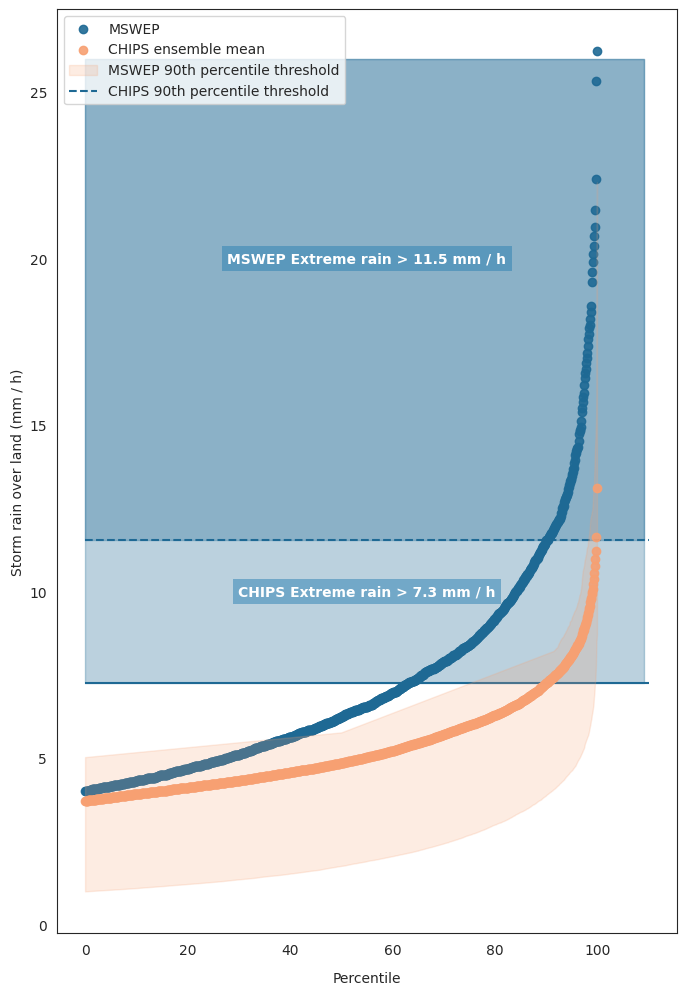

In [8]:
# extreme rain over land, because using a threshold over water - skews results to just water rain
# 50 mm is relative to rain guages
# this way is relative to the scale of the dataset - looking at 90th percentile of land-based tc rain. If the rain exceeds this then we label it as extreme tc rain

sns.set_style("white")
plt.figure(figsize=(8, 12))
pcolour = '#f7a072'
blue = '#1e6994'
# m = plt.scatter(np.array(range(len(p)))/10,q/3,c=percentiles,cmap='viridis',vmin=0,vmax=100, alpha=0.9)
m = plt.scatter(np.array(range(len(p)))/10,q,vmin=0,vmax=100, alpha=0.9,color=blue)
plt.scatter(np.array(range(len(p)))/10,p, alpha=0.9,color=pcolour)
# plt.scatter(np.array(range(len(p585)))/10,p585, alpha=0.9,color='White')
plt.fill_between(x=np.array(range(len(p)))/10, y1=p_min, y2=p_max, color=pcolour, alpha=0.2)
plt.ylabel('Storm rain over land (mm / h)') # this is low because it includes all storm rain that hits the land
plt.xlabel('Percentile',labelpad=10)
plt.xticks([0,20,40,60,80,100])

# cbar = plt.colorbar(m,label='Percentile')
# plt.yscale('symlog')
# plt.xscale('log')
# plt.hlines(50,0,110,linestyle='dotted',color=blue)
plt.hlines(q[900],0,110,linestyle='dashed',color=blue,zorder=0)
plt.hlines(p[900],0,110,color=blue,zorder=0)
plt.legend(['MSWEP','CHIPS ensemble mean','MSWEP 90th percentile threshold','CHIPS 90th percentile threshold'],loc='upper left')


x = np.arange(0, 110)
plt.fill_between(x=x, y1=q[900], y2=26, color=blue, alpha=0.3,zorder=0)
plt.text(55, 20, f'MSWEP Extreme rain > 11.5 mm / h', color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.5, edgecolor='none'))
print(q[900])
plt.fill_between(x=x, y1=p[900], y2=26, color=blue, alpha=0.3,zorder=0)
plt.text(55, 10, f'CHIPS Extreme rain > 7.3 mm / h', color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.5, edgecolor='none'))
print(p[900])
print(p_min[900])
print(p_max[900])
# plt.fill_between(x=x, y1=50, y2=60, color=blue, alpha=0.3,zorder=0)
# plt.text(55, 55, f'WMO Extreme rain > 50 mm / h', color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.5, edgecolor='none'))


tick_positions = np.linspace(0, 100, 11)  # Positions from 0% to 100%
tick_labels = [0,20,40,60,80,100]
# cbar.set_ticklabels(tick_labels)
plt.savefig('extreme_threshold2.png',bbox_inches='tight')
# https://severeweather.wmo.int/observation.html#:~:text=Definition%20of%20Heavy%20Rain%2FSnow,in%20the%20past%2024%20hours.
# 50 mm in last 24 hours
# https://community.wmo.int/en/activity-areas/aviation/hazards/precipitation
#  Heavy rain is defined as rates in excess of 4 mm per hour while heavy showers are defined as rates in excess of 10 mm per hour. 

In [9]:
model = 'mpi6'
scenario = 'hist'
data = np.load(f'/user/home/al18709/work/event_sets/wgan_{model}_{scenario}/{model}_{scenario}_mean_extreme_global.npy')
data2 = np.load(f'/user/home/al18709/work/event_sets/wgan_{model}_{scenario}/{model}_{scenario}_count_extreme_global.npy')
data3 = np.load('/user/home/al18709/work/event_sets/mswep_obs/mswep_obs_mean_extreme_global.npy')

mpi6 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_hist/mpi6_hist_mean_extreme_global.npy')
mri6 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_hist/mri6_hist_mean_extreme_global.npy')
ukmo = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_hist/ukmo_hist_mean_extreme_global.npy')
canesm = np.load('/user/home/al18709/work/event_sets/wgan_canesm_hist/canesm_hist_mean_extreme_global.npy')
ecearth6 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_hist/ecearth6_hist_mean_extreme_global.npy')
ipsl6 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_hist/ipsl6_hist_mean_extreme_global.npy')
miroc6 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_hist/miroc6_hist_mean_extreme_global.npy')
cnrm6 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_hist/cnrm6_hist_mean_extreme_global.npy')

mpi6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_ssp585/mpi6_ssp585_mean_extreme_global.npy')
mri6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_ssp585/mri6_ssp585_mean_extreme_global.npy')
ukmo_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_ssp585/ukmo_ssp585_mean_extreme_global.npy')
canesm_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_canesm_ssp585/canesm_ssp585_mean_extreme_global.npy')
ecearth6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_ssp585/ecearth6_ssp585_mean_extreme_global.npy')
ipsl6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_ssp585/ipsl6_ssp585_mean_extreme_global.npy')
miroc6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_ssp585/miroc6_ssp585_mean_extreme_global.npy')
cnrm6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_ssp585/cnrm6_ssp585_mean_extreme_global.npy')

In [10]:
print(np.sum(mpi6_ssp585 - mpi6))
print(np.sum(mri6_ssp585 - mri6))
print(np.sum(ukmo_ssp585 - ukmo))

-22845.979624804375
1088023.5223965796
3529359.2551737516


In [11]:
def rain_threshold(data):
    # return (data3 * [data3 > 7.8])[0,:,:]
    return (data * [data > 7.3])[0,:,:]

In [12]:
print(data3.shape)
data3 = (data3 * [data3 > 11.8])[0,:,:]
# data4 = (data4 * [data4 > 4.8])[0,:,:]
mpi6 = rain_threshold(mpi6)
mri6 = rain_threshold(mri6)
ukmo = rain_threshold(ukmo)
canesm = rain_threshold(canesm)
ecearth6 = rain_threshold(ecearth6)
ipsl6 = rain_threshold(ipsl6)
miroc6 = rain_threshold(miroc6)
cnrm6 = rain_threshold(cnrm6)

mpi6_ssp585 = rain_threshold(mpi6_ssp585)
mri6_ssp585 = rain_threshold(mri6_ssp585)
ukmo_ssp585 = rain_threshold(ukmo_ssp585)
canesm_ssp585 = rain_threshold(canesm_ssp585)
ecearth6_ssp585 = rain_threshold(ecearth6_ssp585)
ipsl6_ssp585 = rain_threshold(ipsl6_ssp585)
miroc6_ssp585 = rain_threshold(miroc6_ssp585)
cnrm6_ssp585 = rain_threshold(cnrm6_ssp585)

print(data3.shape)

(1800, 3600)


(1800, 3600)


In [13]:
# # go through rain arrays and calculate mean
# file_dir = f'/user/home/al18709/work/event_sets/processing/{model}_{scenario}/'
# tc_dir = f'/user/home/al18709/work/event_sets/wgan_{model}_{scenario}/'
# tc_files1 = np.array(np.sort(os.listdir(tc_dir))[:])
# tc_files2 = ['.nc' in file for file in tc_files1]
# tc_files = tc_files1[tc_files2][:10]

# files = os.listdir(file_dir)
# nstorms = sum('.nc' in file for file in tc_files)
# global_extreme_rain = np.zeros((nstorms, 1800, 3600))
# global_extreme_count = np.zeros((nstorms, 1800, 3600))
# for i,_ in enumerate(tc_files):
# 	print(i)
# 	if i in [637,1033,1034]:
# 		continue
# 	rain = np.load(f'{file_dir}{i}_rain.npy')
# 	rain_count = np.load(f'{file_dir}{i}_count.npy')
# 	global_extreme_rain[i,:,:] = rain
# 	global_extreme_count[i,:,:] = rain_count

# test_data = np.sum(global_extreme_count,axis=0)
# test_data[test_data > 0] = 1

In [14]:
# rain = np.load('/user/home/al18709/work/event_sets/MSWEP/accumulated_global.npy')
# models = ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6'] #ukmo
# # scenario = ['hist','ssp585']

# for model in models:
#     globals()[f'rain_{model}_hist'] = np.load(f'/user/home/al18709/work/event_sets/wgan_{model}_hist/{model}_hist_accumulated_global.npy')
#     globals()[f'rain_{model}_ssp585'] = np.load(f'/user/home/al18709/work/event_sets/wgan_{model}_ssp585/{model}_ssp585_accumulated_global.npy')


In [15]:
hist_rain_model_agreement = np.zeros(lats.shape)
models = ['canesm_ssp585','cnrm6_ssp585','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo'] #ukmo
for model in models:
    model_says_rain = globals()[f'{model}'] > 0
    hist_rain_model_agreement = hist_rain_model_agreement + model_says_rain

hist_rain_model_agreement = hist_rain_model_agreement >= 8


ssp585_rain_model_agreement = np.zeros(lats.shape)
models = ['canesm_ssp585','cnrm6_ssp585','ecearth6_ssp585','ipsl6_ssp585','miroc6_ssp585','mpi6_ssp585','mri6_ssp585','ukmo_ssp585'] #ukmo
for model in models:
    model_says_rain = globals()[f'{model}'] > 0
    ssp585_rain_model_agreement = ssp585_rain_model_agreement + model_says_rain

ssp585_rain_model_agreement = ssp585_rain_model_agreement >= 8


In [16]:
colour1 = "#bf8021"
drier_cmap = LinearSegmentedColormap.from_list('drier_cmap', [colour1, colour1])

colour2 = "#216c9e"
wetter_cmap = LinearSegmentedColormap.from_list('wetter_cmap', [colour2, colour2])

colour3 = "#9e2192"
extreme_cmap = LinearSegmentedColormap.from_list('wetter_cmap', [colour3, colour3])

colour4 = "#58b1ed"
hist_cmap = LinearSegmentedColormap.from_list('hist_cmap', [colour4, colour4])

In [17]:
condition = (hist_rain_model_agreement == True) & (ssp585_rain_model_agreement == True)
historical_rain = hist_rain_model_agreement * condition

condition = (hist_rain_model_agreement == False) & (ssp585_rain_model_agreement == True)
new_rain = ssp585_rain_model_agreement * condition

condition = (hist_rain_model_agreement == True) & (ssp585_rain_model_agreement == False)
new_dry = hist_rain_model_agreement * condition

# calculate area of land affected sqkm
land_hist = np.sum(historical_rain * z) * 100 
land_newly_exposed = np.sum(new_rain * z) * 100
land_newly_unexposed = np.sum(new_dry * z) * 100

print(land_hist)
print(land_newly_exposed)
print(land_newly_unexposed)

# calculate population affected
population = pop.population.values
population[population == -inf] = 0
pop_hist = np.sum(historical_rain * population)
pop_newly_exposed = np.sum(new_rain * population)
pop_newly_unexposed = np.sum(new_dry * population)

print(pop_hist)
print(pop_newly_exposed)
print(pop_newly_unexposed)

# ssp585_rain_model_agreement 
# hist_rain_model_agreement 

3853200
1864800
967700
3116834300.0
245571700.0
150983620.0


In [18]:
# Function to check if a point is within a polygon
from matplotlib.path import Path
# Function to check if a point is within a polygon
def point_in_polygon(points, polygon):
    path = Path(polygon)
    return path.contains_points(points)

In [19]:
def correct_pop(data):
    population_flip = data[::-1, :]
    blank_rows = np.zeros((120, population_flip.shape[1]))  # Create an array of zeros with the same number of columns as arr
    population_inserted = np.insert(population_flip, 0, blank_rows, axis=0)
    return population_inserted[:-120,:]

In [20]:
# calculate basin storms
basins = {
    'NA': [ (75, 25), (75, 89),(85, 89), (179, 89), (179, 0), (115, 0)],
    'NI': [(-150,0),(-150,89),(-80,89),(-80,0),(-150,0)],
    'NWP': [(-80,0),(-80,89),(0,89),(0,0)],
    'NEP': [(0,0),(0,89),(75,89),(75,25),(115,0)],
    'SIO': [(-160,-89),(-160,0),(-45,0),(-45,-89)],
    'SWP': [(-45,-89),(-45,0),(115,0),(115,-89)],
    'SA': [(115,-89),(115,0),(180,0),(180,-89)],
    # '': [] (-180, -160, -90, 0),
}

# Create a boolean mask for each basin
lons2 = (lons + 180)
basin_masks = {}
# calculate population affected
population = pop.population.values
population[population == -inf] = 0
population = correct_pop(population)

# loop through basins
for basin, vertices in basins.items():
    vertices = np.array(vertices)
    print(basin)
    # print(vertices.shape)
    
    n,m = lons.shape
    points = []
    for i in range(n):
        for j in range(m):
            points.append((lons[i,j],lats[i,j]))
    globals()[f'{basin}_mask'] = np.zeros_like(lons, dtype=bool)
    globals()[f'{basin}_mask'] |= point_in_polygon(points, vertices).reshape((1800,3600) )

    # calculate area of land affected sqkm
    globals()[f'{basin}_land_hist'] = np.sum(historical_rain * z * globals()[f'{basin}_mask']) * 100 
    globals()[f'{basin}_land_newly_exposed'] = np.sum(new_rain * z * globals()[f'{basin}_mask']) * 100
    globals()[f'{basin}_land_newly_unexposed'] = np.sum(new_dry * z * globals()[f'{basin}_mask']) * 100

    print('land exposed historically: ',globals()[f'{basin}_land_hist'])
    print('land newly exposed: ',globals()[f'{basin}_land_newly_exposed'])
    print('land newly unexposed : ',globals()[f'{basin}_land_newly_unexposed'])

    
    globals()[f'{basin}_pop_hist'] = np.sum(historical_rain * globals()[f'{basin}_mask'] * population)
    globals()[f'{basin}_pop_newly_exposed'] = np.sum(new_rain * globals()[f'{basin}_mask'] * population)
    globals()[f'{basin}_pop_newly_unexposed'] = np.sum(new_dry * globals()[f'{basin}_mask'] * population)

    print('population exposed historically: ',globals()[f'{basin}_pop_hist'])
    print('population newly exposed: ',globals()[f'{basin}_pop_newly_exposed'])
    print('population newly unexposed: ',globals()[f'{basin}_pop_newly_unexposed'])

NA
land exposed historically:  1125000
land newly exposed:  423700
land newly unexposed :  234600
population exposed historically:  535165440.0
population newly exposed:  141527250.0
population newly unexposed:  62182330.0
NI
land exposed historically:  295200
land newly exposed:  388900
land newly unexposed :  134500
population exposed historically:  21808404.0
population newly exposed:  33132484.0
population newly unexposed:  21534288.0
NWP
land exposed historically:  80500
land newly exposed:  32000
land newly unexposed :  38500
population exposed historically:  21948412.0
population newly exposed:  4461887.0
population newly unexposed:  7300981.5
NEP
land exposed historically:  231100
land newly exposed:  341300
land newly unexposed :  45500
population exposed historically:  83270520.0
population newly exposed:  108320760.0
population newly unexposed:  5465074.5
SIO
land exposed historically:  800
land newly exposed:  100
land newly unexposed :  100
population exposed historically:

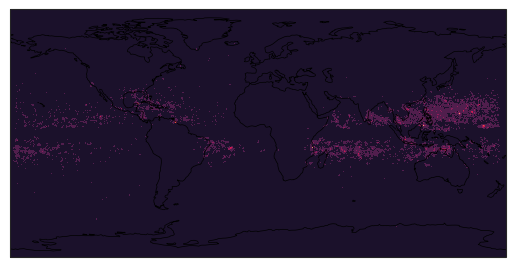

In [21]:
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.contourf(lons2,lats,NA_mask)
# ax.contourf(lons2,lats,NI_mask)
# ax.contourf(lons2,lats,NWP_mask)
# ax.contourf(lons2,lats,NEP_mask)
# ax.contourf(lons2,lats,SIO_mask)
# ax.contourf(lons2,lats,SWP_mask)
# ax.contourf(lons2,lats,SA_mask)
# population_bool = population > 0
# population_flip = population_bool[::-1, :]
# blank_rows = np.zeros((120, population_flip.shape[1]))  # Create an array of zeros with the same number of columns as arr
# population_inserted = np.insert(population_flip, 0, blank_rows, axis=0)
# global_population = population_inserted[:-120,:]


# blank_rows = np.zeros((120, pop_new.shape[1]))  # Create an array of zeros with the same number of columns as arr
# pop_new_new = np.insert(pop_new, 0, blank_rows, axis=0)
# global_pop_new = pop_new_new[:-120,:]

ax.contourf(lons,lats,population)
ax.contourf(lons,lats,cnrm6_ssp585)
ax.coastlines(resolution='110m', linewidth=0.5)
# print(SA_mask)

In [22]:
print(np.sum((hist_rain_model_agreement == True)))
print(np.sum((ssp585_rain_model_agreement == False)))
print(np.sum((hist_rain_model_agreement == True) & (ssp585_rain_model_agreement == False)))

739795
5648286
73814


In [23]:
print(np.sum(ssp585_rain_model_agreement < 1))
print(np.sum(hist_rain_model_agreement > 0))

5648286
739795


In [24]:
fp = '/user/home/al18709/work/topography/topography_10km_nn.nc'
top_file = xr.load_dataset(fp,engine="netcdf4")
topography = top_file.z

In [25]:
print(topography.shape)

(1800, 3600)


In [26]:
def create_custom_diverging_colormap(colors_below_zero, colors_above_zero, name='custom_diverging_colormap'):
    """
    Create a custom diverging colormap from lists of colors for values below and above zero.
    
    Parameters:
        colors_below_zero (list): List of colors for values below zero.
        colors_above_zero (list): List of colors for values above zero.
        name (str): Name of the custom colormap.
    
    Returns:
        colormap: A LinearSegmentedColormap object representing the custom diverging colormap.
    """
    n_below = len(colors_below_zero)
    n_above = len(colors_above_zero)
    
    cmap_data = []
    
    # Add colors for values below zero
    for i, color in enumerate(colors_below_zero):
        cmap_data.append((i / (n_below - 1), color))
        
    # Add colors for values above zero
    for i, color in enumerate(colors_above_zero):
        cmap_data.append((i / (n_above - 1), color))
        
    return LinearSegmentedColormap.from_list(name, cmap_data)

# Example usage:
colors_below_zero = ['#a9d6e5', '#89c2d9', '#61a5c2','#468faf','#2c7da0','#2a6f97','#014f86','#01497c','#013a63','#013a63','#012a4a']
colors_above_zero = ['#98c9a3', '#bfd8bd', '#dde7c7','#dde7c7','#edeec9','#e6ccb2','#ddb892','#b08968','#7f5539','#ede0d4','#f4f4ed']
custom_diverging_cmap = create_custom_diverging_colormap(colors_below_zero, colors_above_zero)



In [58]:
def make_cmap(high_vals=False,low_vals=False):
	# clevs = [-12000, -10000, -8000, -6000, -4000, -3000, -2000, -1000,-500, -100, -50, 0, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
	clevs = [-12000, -10000, -8000, -6000, -4000, -3000, -2000, -1000,-500, -100, -50, 0, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
	colours = ['#012a4a',#-12000
			'#013a63',#-10000
			'#013a63',#-8000
			'#01497c',#-6000
			'#014f86',#-4000
			'#2a6f97',#-3000
			'#2c7da0',#-2000
			'#468faf',
			'#61a5c2',
			'#89c2d9',
			'#93c7db',
			'#a9d6e5',
			'#c2e2ed',
			'#dde7c7', '#bfd8bd', '#98c9a3','#dde7c7','#edeec9','#e6ccb2','#ddb892','#b08968','#ede0d4','#f4f4ed'] #'#7f5539'

	# cmap = matplotlib.colors.ListedColormap(metpy.plots.ctables.colortables["terrain"][:len(clevs)-1], 'terrain')
	# pnorm = matplotlib.colors.BoundaryNorm(clevs, precip_cmap.N)
	N =  len(colours) * 10
	cmap = LinearSegmentedColormap.from_list('tc_colours',colours,N=N) #increasing N makes it smoother
	norm = matplotlib.colors.BoundaryNorm(clevs, cmap.N,extend='max')
	return cmap,norm

cmap,norm = make_cmap()

[-11000 -10000  -9000  -8000  -7000  -6000  -5000  -4000  -3000  -2000
  -1000      0   1000   2000   3000   4000   5000   6000   7000   8000]
(1800, 1800)
(1800, 5400)
(1800, 3600)


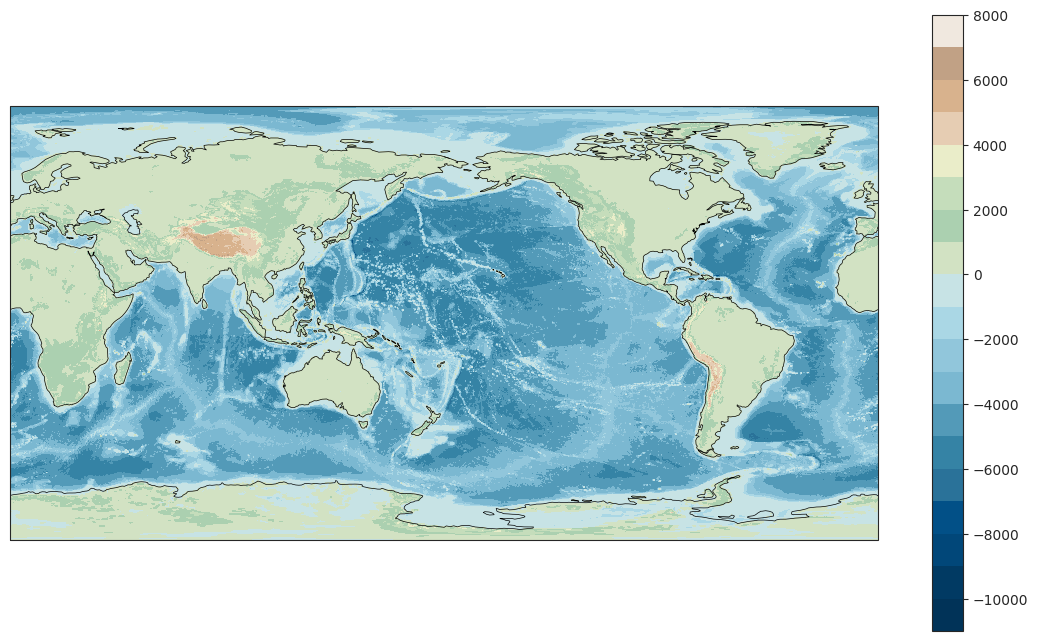

In [61]:
plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# ax.contourf(lons,lats,population)
levels = np.arange(-11000,8800,1000)
print(levels)
# m = ax.contourf(lons,lats,topography,levels=levels,cmap=cmap,alpha=0.7)

insert = topography[:,-1800:].transpose()
print(insert.shape)
topography_inserted = np.insert(topography, 0, insert, axis=1)
print(topography_inserted.shape)
topography_new = topography_inserted[:,:3600]
# topography[:,1800:]
print(topography_new.shape)
m = ax.contourf(lons,lats,topography_new,levels=levels,cmap=cmap,alpha=1)
ax.coastlines(resolution='110m', linewidth=0.5)
plt.colorbar(m)

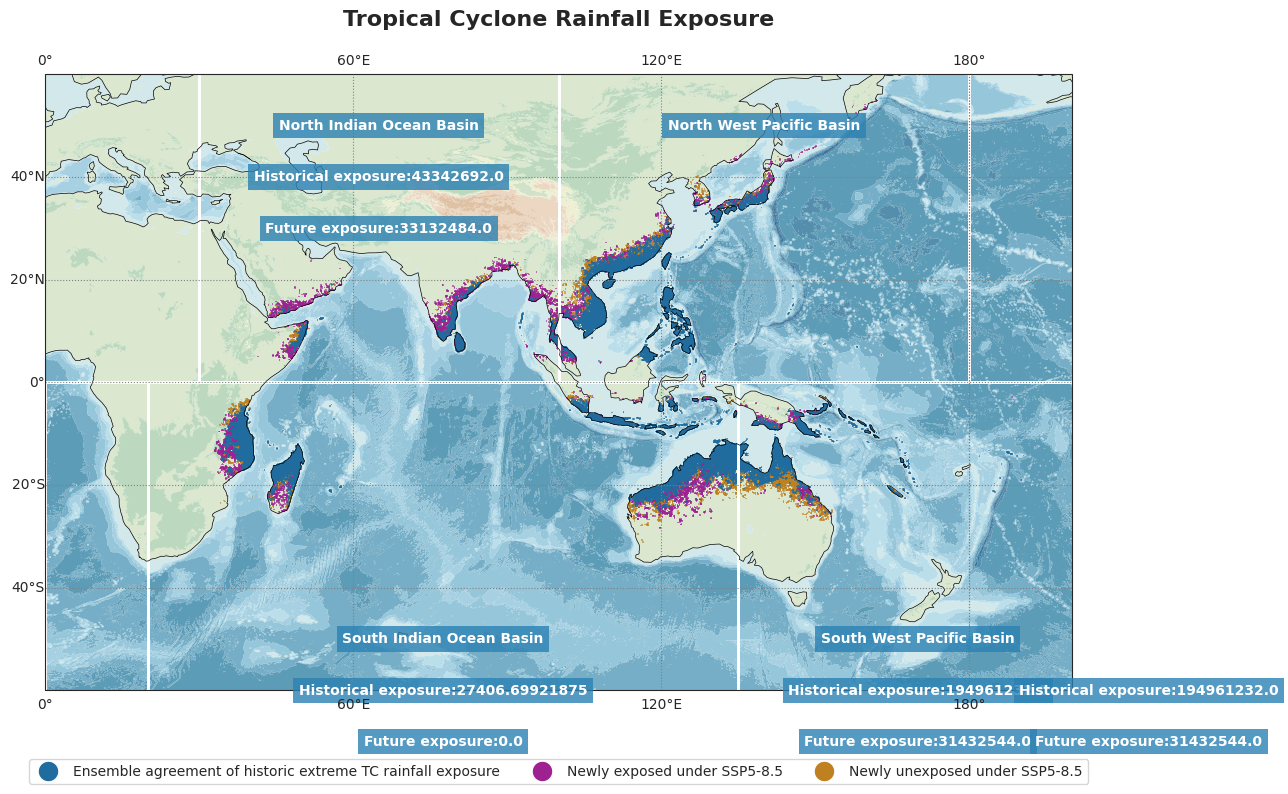

In [76]:
# mask for land and high rainfall
# land_rain = rain * z
# z2 = land_rain >= 100
# extreme_rain = land_rain * z2

# Create a new figure
plt.figure(figsize=(14, 8))
# levels = [20, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 7000, 10000]
# levels = range(0,10000,200)[1:]

# Define the projection (PlateCarree for a simple cylindrical projection)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))  # Centered on the Pacific Ocean
lons2 = (lons + 180)

# look at land only

# ax.contourf(lons2,lats,ma.masked_equal(data3 * z,0),cmap=drier_cmap,alpha=0.8)

# ax.contourf(lons2,lats,ma.masked_equal(ssp585_rain_model_agreement * z,0),cmap=extreme_cmap,alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(hist_rain_model_agreement * z,0),cmap=wetter_cmap,alpha=0.7)

# ax.contourf(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(new_dry * z,0),cmap=drier_cmap,alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(historical_rain * z,0),cmap=wetter_cmap,alpha=0.7)

m = ax.contourf(lons,lats,topography_new,levels=levels,cmap=cmap,alpha=0.8,antialiased=True)
ax.pcolor(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(new_dry * z,0),cmap=drier_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(historical_rain * z,0),cmap=wetter_cmap,alpha=0.6)

# Add coastlines with thinner lines
# ax.stock_img()
ax.coastlines(resolution='110m', linewidth=0.5)

# Add grid lines with dotted linestyle
gl = ax.gridlines(draw_labels=True, linestyle=':',color='Gray',linewidth=0.8)

# Label x and y axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set title
ax.set_title('Tropical Cyclone Rainfall Exposure', loc='center',pad=20,weight='bold',fontsize=16)

basins = {
    'North Indian Ocean Basin': (-150, -80, 0, 89),
    'North West Pacific Basin': (-80, 0, 0, 89),
    'South Indian Ocean Basin': (-160, -45, -89, 0),
    'South West Pacific Basin': (-45, 115, -89, 0),
    '': (-180, -160, -90, 0),
}
    
for basin, bbox in basins.items():
    if isinstance(bbox, list):
        basin_patch = plt.Polygon(bbox, edgecolor='white', facecolor='none', linewidth=2)
    else:
        # basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
        #                         edgecolor='white', facecolor='none', linewidth=2)
        basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
                                        edgecolor='white', facecolor='none', linewidth=2)
        ax.add_patch(basin_patch)
    ax.add_patch(basin_patch)

    if isinstance(bbox, list):
        text_x = (bbox[0][0] + bbox[3][0]) / 2  # Calculate x-coordinate for text
        text_y = 50  # Calculate y-coordinate for text
    else:
        text_x = (bbox[0] + bbox[1]) / 2  # Calculate x-coordinate for text
        if bbox[2] < 0:
            text_y = -50 # (bbox[2] + bbox[3]) / 2  # Calculate y-coordinate for text
        else:
            text_y = 50
    if basin == 'South West Pacific Basin':
        ax.text(-10, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(-10, text_y-10, f'Historical exposure:{SWP_pop_hist+SWP_pop_newly_unexposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(-10, text_y-20, f'Future exposure:{SWP_pop_newly_exposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    else:
        ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    
    if basin == 'North Indian Ocean Basin':
        ax.text(text_x, text_y-10, f'Historical exposure:{NI_pop_hist+NI_pop_newly_unexposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x, text_y-20, f'Future exposure:{NI_pop_newly_exposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    elif basin == 'South Indian Ocean Basin':
        ax.text(text_x, text_y-10, f'Historical exposure:{SIO_pop_hist+SIO_pop_newly_unexposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x, text_y-20, f'Future exposure:{SIO_pop_newly_exposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    elif basin == 'South West Pacific Basin':
        ax.text(text_x, text_y-10, f'Historical exposure:{SWP_pop_hist+SWP_pop_newly_unexposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x, text_y-20, f'Future exposure:{SWP_pop_newly_exposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
   

# Define the colors and labels for the legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour2, markersize=15, label='Ensemble agreement of historic extreme TC rainfall exposure'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour3, markersize=15, label='Newly exposed under SSP5-8.5'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour1, markersize=15, label='Newly unexposed under SSP5-8.5')
]

# Define the extent
extent = [0, 200, -60, 60] 
ax.set_extent(extent, crs=ccrs.PlateCarree())

# extent = [60, 110, 0, 20] 
# ax.set_extent(extent, crs=ccrs.PlateCarree())

# Create the legend and position it below the axes
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=3)


# Show the plot
plt.savefig('TC_basins_exposure.png',bbox_inches='tight',dpi=300)

# Tropical Cyclones and Climate Change Assessment Part II: Projected Response to Anthropogenic Warming Supplementary

# more thought on 1m threshold - 1m per year/season, 1m per storm, rainfall / nstorms - too angled towards intensity change which isn't explored with dynamical, height of building or similar
# 245 in supplementary
# account for decrease in rain extent blue for more rain, red for less rain in future

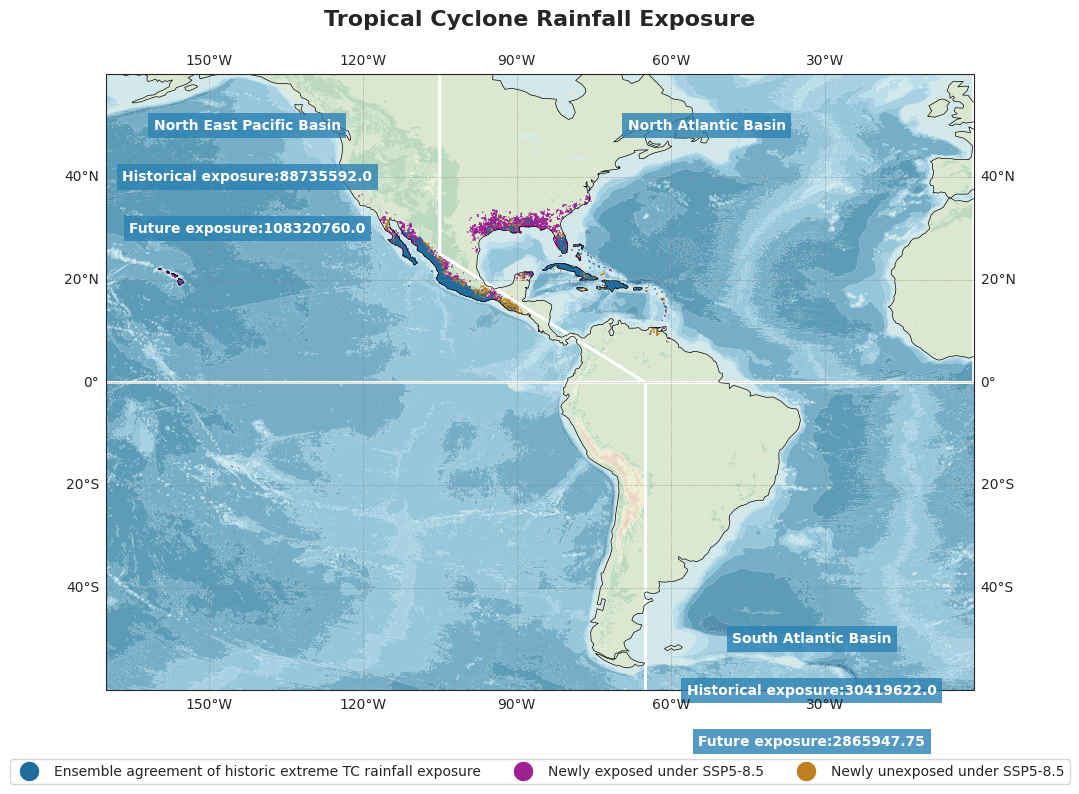

In [75]:
# mask for land and high rainfall
# land_rain = rain * z
# z2 = land_rain >= 100
# extreme_rain = land_rain * z2

# Create a new figure
plt.figure(figsize=(14, 8))
# levels = [20, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 7000, 10000]
# levels = range(0,10000,200)[1:]

# Define the projection (PlateCarree for a simple cylindrical projection)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))  # Centered on the Pacific Ocean
lons2 = (lons + 180)


# look at land only
# ax.contourf(lons2,lats,rain,cmap=precip_cmap,levels =levels,alpha=0.8)
# ax.contourf(lons2,lats,land_rain,cmap=precip_cmap,levels =levels,alpha=0.8)
# ax.contourf(lons2,lats,land_rain,cmap='viridis_r',levels =levels,alpha=0.8)
# ax.contourf(lons2,lats,land_rain,cmap='plasma_r',levels =levels,alpha=0.8)

# ax.contourf(lons2,lats,hist_rain_coverage * z,cmap='Blues',levels = [1,2,3,4,5,6,7,8],alpha=0.8)
# ax.contourf(lons2,lats,ssp585_rain_coverage * z,cmap='Reds',levels = [1,2,3,4,5,6,7,8],alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(ssp585_rain_model_agreement * z,0),cmap=extreme_cmap,alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(hist_rain_model_agreement * z,0),cmap=wetter_cmap,alpha=0.7)
m = ax.contourf(lons,lats,topography_new,levels=levels,cmap=cmap,alpha=0.8,antialiased=True)
ax.pcolor(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(new_dry * z,0),cmap=drier_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(historical_rain * z,0),cmap=wetter_cmap,alpha=0.6)

# ax.contourf(lons2,lats,ma.masked_equal(hist_agreement * z,0),cmap='Accent',alpha=0.9)
# ax.contourf(lons2,lats,ma.masked_equal(ssp585_agreement * z,0),cmap='coolwarm',alpha=0.9)
# ax.contourf(lons2,lats,ma.masked_equal(ssp585_agreement * z,0),cmap='Set3',alpha=0.9)
# ax.contourf(lons2,lats,ssp585_agreement * z,cmap='Reds',alpha=0.8,levels=[0,1])

# ax.contourf(lons2,lats,extreme_rain,cmap=precip_cmap,levels =levels,alpha=0.8)

# Add coastlines with thinner lines
# ax.stock_img()
# ax.coastlines(resolution='110m', linewidth=0.5)
ax.coastlines(resolution='110m', linewidth=0.5)

# Add grid lines with dotted linestyle
gl = ax.gridlines(draw_labels=True, linestyle=':',color='Gray',linewidth=0.5)

# Label x and y axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set title
ax.set_title('Tropical Cyclone Rainfall Exposure', loc='center',pad=20,weight='bold',fontsize=16)

# Add boxes and text annotations for the tropical cyclone basins
# basins = {
#     'North Atlantic Basin': [ (75, 25), (75, 89),(85, 89), (179, 89), (179, 0), (115, 0)],
#     'North Indian Ocean Basin': (-150, -80, 0, 89),
#     'North West Pacific Basin': (-80, 0, 0, 89),
#     'North East Pacific Basin': [(0,0),(0,89),(75,89),(75,25),(115,0)],
#     'South Indian Ocean Basin': (-160, -45, -89, 0),
#     'South West Pacific Basin': (-45, 115, -89, 0),
#     'South Atlantic Basin': (115, 180, -89, 0),
#     '': (-180, -160, -90, 0),
# }

basins = {
    'North Atlantic Basin': [ (75, 25), (75, 89),(85, 89), (179, 89), (179, 0), (115, 0)],
    'North East Pacific Basin': [(0,0),(0,89),(75,89),(75,25),(115,0)],
    'South Atlantic Basin': (115, 180, -89, 0),
    '': (-180, -160, -90, 0),
}
    
for basin, bbox in basins.items():
    if isinstance(bbox, list):
        basin_patch = plt.Polygon(bbox, edgecolor='white', facecolor='none', linewidth=2)
    else:
        # basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
        #                         edgecolor='white', facecolor='none', linewidth=2)
        basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
                                        edgecolor='white', facecolor='none', linewidth=2)
        ax.add_patch(basin_patch)
    ax.add_patch(basin_patch)

    if isinstance(bbox, list):
        text_x = (bbox[0][0] + bbox[3][0]) / 2  # Calculate x-coordinate for text
        text_y = 50  # Calculate y-coordinate for text
    else:
        text_x = (bbox[0] + bbox[1]) / 2  # Calculate x-coordinate for text
        if bbox[2] < 0:
            text_y = -50 # (bbox[2] + bbox[3]) / 2  # Calculate y-coordinate for text
        else:
            text_y = 50
    ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    if basin == 'North Atalntic Basin':
        ax.text(text_x, text_y-10, f'Historical exposure:{NA_pop_hist+NA_pop_newly_unexposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x, text_y-20, f'Future exposure:{NA_pop_newly_exposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    elif basin == 'North East Pacific Basin':
        ax.text(text_x, text_y-10, f'Historical exposure:{NEP_pop_hist+NEP_pop_newly_unexposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x, text_y-20, f'Future exposure:{NEP_pop_newly_exposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    elif basin == 'South Atlantic Basin':
        ax.text(text_x, text_y-10, f'Historical exposure:{SA_pop_hist+SA_pop_newly_unexposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x, text_y-20, f'Future exposure:{SA_pop_newly_exposed}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
   

# Define the colors and labels for the legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour2, markersize=15, label='Ensemble agreement of historic extreme TC rainfall exposure'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour3, markersize=15, label='Newly exposed under SSP5-8.5'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour1, markersize=15, label='Newly unexposed under SSP5-8.5')
]

# Define the extent
extent = [190, 359, -60, 60] 
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Create the legend and position it below the axes
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=3)


# Show the plot
plt.savefig('TC_basins_exposure.png',bbox_inches='tight',dpi=300)

# Tropical Cyclones and Climate Change Assessment Part II: Projected Response to Anthropogenic Warming Supplementary



In [ ]:
rain = np.load('/user/home/al18709/work/event_sets/MSWEP/accumulated_global.npy')

In [ ]:
files = os.listdir('/user/home/al18709/work/event_sets/MSWEP/')
sids = []
for file in files:
    if ('.nc' in file):
        sid = file[6:-3]
        sids.append(sid)

In [ ]:
# calculate population exposure in historical compared to observations and work out error